In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import dask

import filter_hailcast_artefacts as fha

In [2]:
path = "/home/kbrennan/phd/data/cosmo_archive/hailcast_artefacts"
files = os.listdir(path)
files = [f for f in files if f.endswith(".nc")]
files.sort()
files = files[1:]
ds = xr.open_mfdataset(
    [os.path.join(path, file) for file in files],
    combine="by_coords",
    parallel=True,
    chunks={"time": 1, "x_1": 100, "y_1": 100},
)

In [3]:
graupel_swath = ds.GRAU_GSP.max(dim='time').compute().squeeze()
hail_swath = ds.DHAIL_MX.max(dim='time').compute().squeeze()

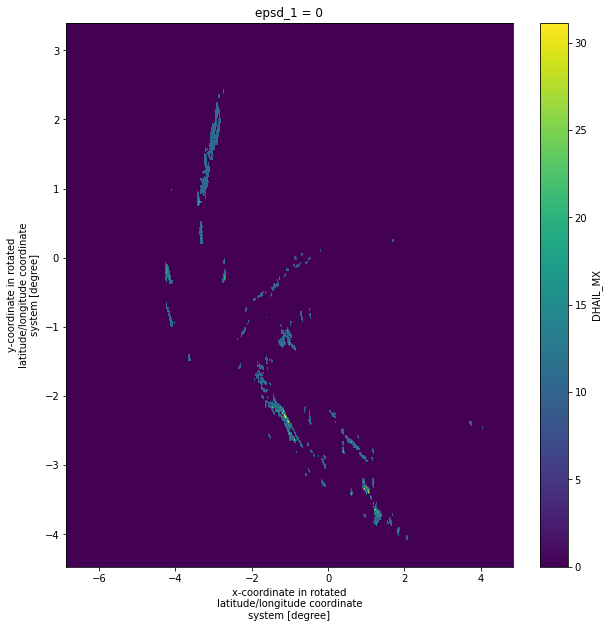

In [9]:
hail_swath.plot(figsize=(10, 10))

In [4]:
graupel_swath

<xarray.DataArray 'GRAU_GSP' (y_1: 786, x_1: 1170)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * x_1      (x_1) float32 -6.86 -6.85 -6.84 -6.83 -6.82 ... 4.8 4.81 4.82 4.83
  * y_1      (y_1) float32 -4.46 -4.45 -4.44 -4.43 -4.42 ... 3.36 3.37 3.38 3.39
    lon_1    (y_1, x_1) float32 0.7593 0.7727 0.786 0.7993 ... 17.51 17.52 17.54
    lat_1    (y_1, x_1) float32 42.14 42.14 42.14 42.14 ... 50.16 50.16 50.16
    epsd_1   int32 0

/tmp/ipykernel_30207/1622903667.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(graupel_swath.lon_1, graupel_swath.lat_1, graupel_swath)


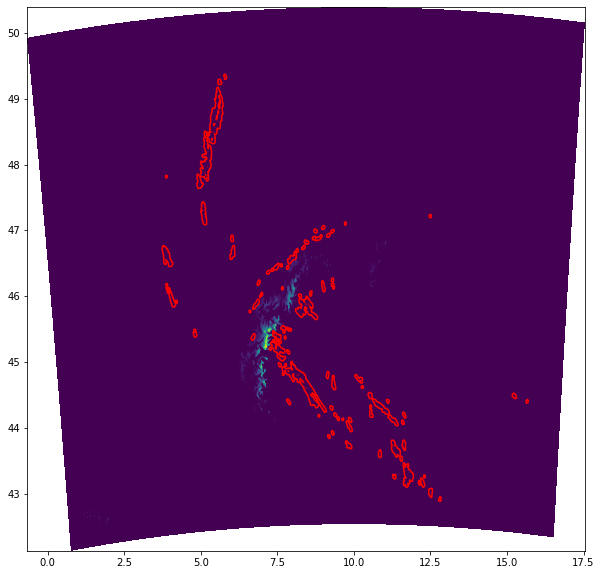

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pcolormesh(graupel_swath.lon_1, graupel_swath.lat_1, graupel_swath)
ax.contour(hail_swath.lon_1, hail_swath.lat_1, hail_swath, levels=[1], colors='r')
# ax.set_xlim(5, 10)
# ax.set_ylim(44, 47)
